Імпортую бібліотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Прив'язую гугл диск до роботи

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Завдання 1

<h3>Повторити дії описані в пункті «Часові ряди і проста лінійна регресія частина 2» даної лабораторної роботи та порівняти з результатом попередньої лабораторної роботи.

Вказую шлях до файлу та зчитую дані

In [38]:
filename = "/content/drive/My Drive/KPI/ML/ML3/1895-2023.csv"
df = pd.read_csv(filename)
df = df[df.Date < 201901]

Переглядаю ключову інформацію

In [39]:
df.head()

,Date,Value
0,189501,28.9
1,189601,27.7
2,189701,28.5
3,189801,33.1
4,189901,29.1


In [40]:
df.tail()

,Date,Value
119,201401,28.7
120,201501,30.0
121,201601,34.5
122,201701,38.1
123,201801,31.8


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 0 to 123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    124 non-null    int64  
 1   Value   124 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.9 KB


Перейменовую стовпець 'Value' в 'Temperature'

In [42]:
df.columns = ['Date', 'Temperature']

In [43]:
df.head(3)

,Date,Temperature
0,189501,28.9
1,189601,27.7
2,189701,28.5


Прибираю значення "01" з кінця усіх дат

In [44]:
df.Date = df.Date.floordiv(100)
df.head(3)

,Date,Temperature
0,1895,28.9
1,1896,27.7
2,1897,28.5


Знаходжу основні статистичні показники

In [45]:
pd.set_option('display.precision', 2)

In [46]:
df.Temperature.describe()

count    124.00
mean      31.49
std        4.50
min       20.70
25%       28.70
50%       31.15
75%       34.50
max       42.20
Name: Temperature, dtype: float64

Перетворюю датафрейм з одновимірного у багатовимірний і розділяю його на навчальні та тестові дані

In [47]:
x_train, x_test, y_train, y_test = train_test_split(df.Date.values.reshape(-1, 1), df.Temperature.values, random_state=11)

Перевіряю пропорції навчальних і тестових даних

In [48]:
x_train.shape

(93, 1)

In [49]:
x_test.shape

(31, 1)

Навчання моделі

Використовую оцінювач LinearRegression

In [50]:
linear_regression = LinearRegression()

In [52]:
linear_regression.fit(X=x_train, y=y_train)

LinearRegression()

Переглядаю кут нахилу та точку перетину осі y

In [53]:
linear_regression.coef_

array([0.03041553])

In [54]:
linear_regression.intercept_

-28.03001569251273

Тестування моделі

Тестую модель за даними з X_test і перевіряю прогнози по набору даних, виводячи прогнозовані і очікувані значення для кожного п'ятого елементу

In [55]:
predicted = linear_regression.predict(x_test)

In [56]:
expected = y_test

In [57]:
for p, e in zip(predicted[::5], expected[::5]):
  print(f'predicted {p:.2f}, expected: {e:.2f}')

predicted 31.83, expected: 25.60
predicted 33.14, expected: 30.10
predicted 30.49, expected: 31.60
predicted 30.88, expected: 39.20
predicted 32.13, expected: 28.00
predicted 31.49, expected: 27.70
predicted 30.40, expected: 32.40


Прогнозування майбутніх температур і оцінка минулих
температур

Спрогнозую температуру в січні на 2023 та 1890 роки

In [58]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [59]:
predict(2023)

array([33.50059975])

In [60]:
predict(1890)

array([29.45533438])

Візуалізація набору даних з регресійній прямий

Будую діаграму розкиду даних

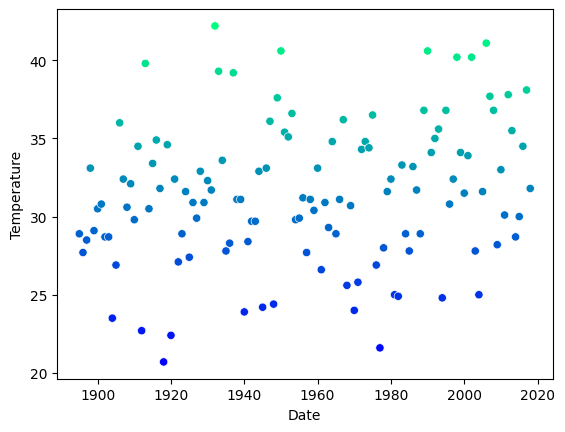

In [61]:
axes = sns.scatterplot(data=df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

Висновок лінійної регресії

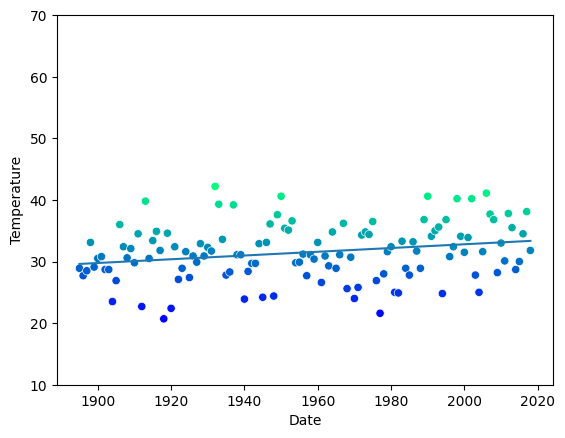

In [71]:
sns.scatterplot(data=df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False).set_ylim(10, 70)
# axes.set_ylim(10, 70)

x = np.array([min(df.Date.values), max(df.Date.values)])
y = predict(x)

line = plt.plot(x, y)

# Завдання 2

<h3>Аналогічно з прикладом з лекції згенеруйте набір даних та
класифікуйте його використавши класифікатор SVC (слайд).

In [72]:
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

(-3.0, 3.0)

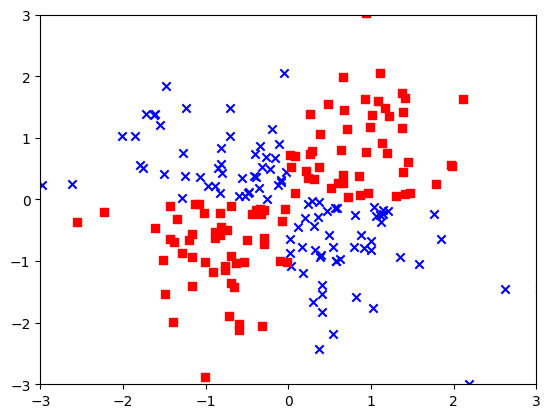

In [74]:
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.ylim([-3,3])
plt.xlim([-3,3])

In [75]:
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid (np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))

  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, c1 in enumerate(np.unique(y)):
    plt.scatter(x=X[y == c1,0],
                y=X[y == c1,1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=c1,
                edgecolor='black')

  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0],
                X_test[:, 1],
                c='',
                edgecolor='black',
                alpha=1.0,
                linewidth=1,
                marker='o',
                s=100,
                label='Тестовий набір')

In [76]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10)
svm.fit(X_xor, y_xor)

SVC(C=10, gamma=0.1, random_state=1)

<ipython-input-75-3a20ef0029c5>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == c1,0],


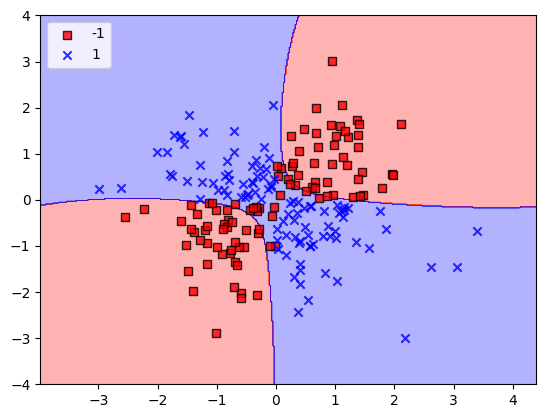

In [77]:
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

# Завдання 3

<h3>Порівняти декілька класифікаційних оцінювачів
наприклад KNeighborsClassifier, SVC та GaussianNB для вбудованого в
scikit-learn одного набору даних (вибрати довільний за бажанням).

In [78]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [79]:
wines = load_iris()
data = wines.data
target = wines.target

In [83]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, random_state=10)

In [85]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, n_jobs=1).fit(X_train, y_train)
nb_classifier = GaussianNB().fit(X_train, y_train)
svm = SVC(kernel='rbf', random_state=1, gamma = 0.1, C=10.0).fit(X_train, y_train)

In [86]:
new_observation = [[0.75, 0.75, 0.75, 0.75]]

print('KNN Classifier:', knn_classifier.predict(new_observation))
print('Gaussian Naive Bayes Classifier:', nb_classifier.predict(new_observation))
print('SVC Classifier:', svm.predict(new_observation))

KNN Classifier: [2]
Gaussian Naive Bayes Classifier: [2]
SVC Classifier: [1]


In [87]:
knn_predicted = knn_classifier.predict(X_test)
bayes_predicted = nb_classifier.predict(X_test)
svm_predicted = svm.predict(X_test)
print('KNN Classifier Accuracy:', accuracy_score(knn_predicted, y_test))
print('Gaussian Naive Bayes Classifier Accuracy:', accuracy_score(bayes_predicted, y_test))
print('SVC Classifier Accuracy:', accuracy_score (svm_predicted, y_test))

KNN Classifier Accuracy: 0.9736842105263158
Gaussian Naive Bayes Classifier Accuracy: 1.0
SVC Classifier Accuracy: 0.9736842105263158
